In [ ]:
import tensorflow as tf
import tensorflow.compat.v1 as tf1
tf1.disable_v2_behavior()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA
import io

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving BograFlood.csv to BograFlood.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['BograFlood.csv']))

In [4]:
df.head(5)

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
0,1356,Bogra,1948,1,25.8,11.7,8.140625,74.218750,0.875926,1.1,7.296226,41883,435303.7,751187.5,24.88,89.36,20,1948.01,NaN
1,1357,Bogra,1948,2,33.3,13.3,11.140625,66.531250,1.022222,1.9,8.267925,41883,435303.7,751187.5,24.88,89.36,20,1948.02,NaN
2,1358,Bogra,1948,3,38.3,17.4,25.312500,61.812500,1.340741,2.1,8.573585,41883,435303.7,751187.5,24.88,89.36,20,1948.03,NaN
3,1359,Bogra,1948,4,39.5,22.7,69.140625,66.203125,1.740741,3.7,8.009434,41883,435303.7,751187.5,24.88,89.36,20,1948.04,NaN
4,1360,Bogra,1948,5,36.1,23.1,179.890625,76.859375,1.781481,4.3,7.303774,41883,435303.7,751187.5,24.88,89.36,20,1948.05,NaN


In [5]:
df.drop(columns='Station_Names',inplace=True)
df.drop(columns='Station_Number',inplace=True)
df.drop(columns='X_COR',inplace=True)
df.drop(columns='Y_COR',inplace=True)
df.drop(columns='LATITUDE',inplace=True)
df.drop(columns='LONGITUDE',inplace=True)
df.drop(columns='ALT',inplace=True)
df['Flood?'] = df['Flood?'].fillna(0)

In [6]:
df.head(5)

,Sl,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Period,Flood?
0,1356,1948,1,25.8,11.7,8.140625,74.218750,0.875926,1.1,7.296226,1948.01,0.0
1,1357,1948,2,33.3,13.3,11.140625,66.531250,1.022222,1.9,8.267925,1948.02,0.0
2,1358,1948,3,38.3,17.4,25.312500,61.812500,1.340741,2.1,8.573585,1948.03,0.0
3,1359,1948,4,39.5,22.7,69.140625,66.203125,1.740741,3.7,8.009434,1948.04,0.0
4,1360,1948,5,36.1,23.1,179.890625,76.859375,1.781481,4.3,7.303774,1948.05,0.0


In [7]:
df.shape

(792, 12)

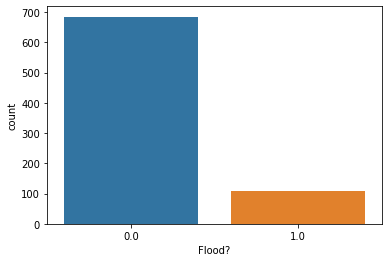

In [8]:
sns.countplot(df['Flood?'],label="Count")

Text(0.5, 1.05, 'Correlation')

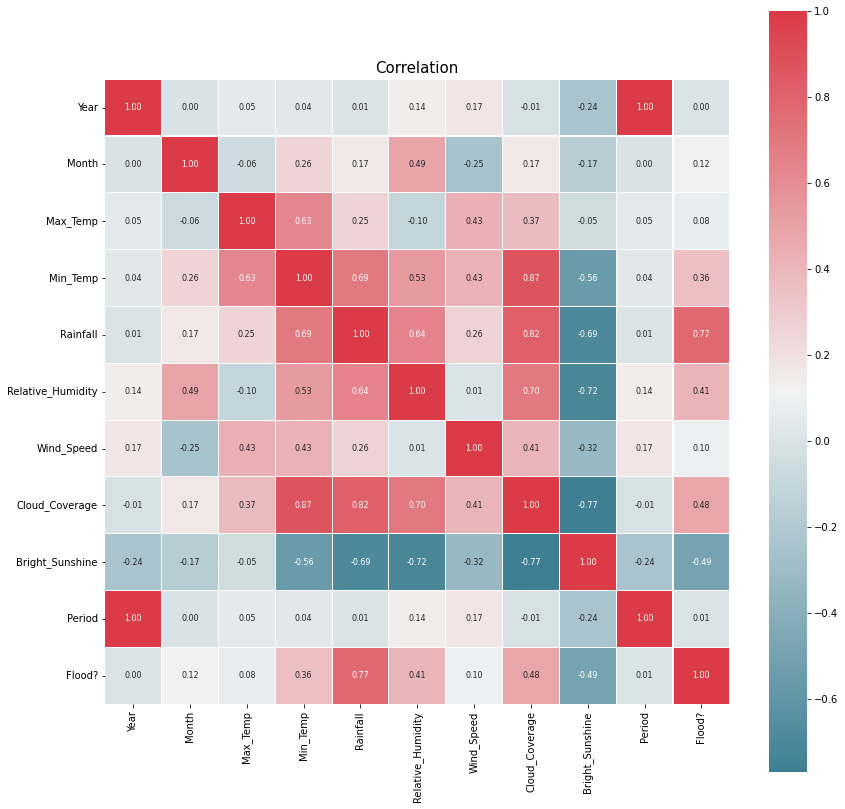

In [9]:
corr = df.iloc[:,1:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation', y=1.05, size=15)

In [10]:
train,test = train_test_split(df, test_size=0.3, random_state=42)
print("Training Data :",train.shape)
print("Testing Data :",test.shape)

Training Data : (554, 12)
Testing Data : (238, 12)


In [11]:
train_id = train['Sl']
test_id = test['Sl']

train_data = train.iloc[:,1:]
test_data = test.iloc[:,1:]

print("Training Data :",train_data.shape)
print("Testing Data :",test_data.shape)

Training Data : (554, 11)
Testing Data : (238, 11)


In [12]:
# Training Data
train_x = train_data.iloc[: , :-1]
train_x = MinMaxScaler().fit_transform(train_x)
print("Training Data :", train_x.shape)

# Testing Data
test_x = test_data.iloc[: , :-1]
test_x = MinMaxScaler().fit_transform(test_x)
print("Testing Data :", test_x.shape)

Training Data : (554, 10)
Testing Data : (238, 10)


In [13]:
train_data.head(5)

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Period,Flood?
536,1992,9,35.6,25.3,424.0,85.0,1.500000,4.2,6.50000,1992.09,1.0
56,1952,9,35.4,25.9,376.0,84.0,1.205556,6.2,5.44717,1952.09,1.0
299,1972,12,30.6,12.8,0.0,72.0,0.400000,0.6,9.60000,1972.12,0.0
275,1970,12,30.6,12.4,0.0,76.0,0.300000,0.1,10.10000,1970.12,0.0
576,1996,1,27.7,12.2,3.0,77.0,0.600000,1.3,7.10000,1996.01,0.0


In [14]:
test_data.head(5)

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Period,Flood?
694,2005,11,32.0,18.1,0.0,80.0,0.400000,1.2,7.700000,2005.11,0.0
528,1992,1,27.9,12.3,0.0,81.0,0.500000,0.7,6.000000,1992.01,0.0
598,1997,11,34.5,18.8,2.0,78.0,0.400000,2.2,7.200000,1997.11,0.0
606,1998,7,35.0,26.5,749.0,89.0,1.200000,7.0,2.800000,1998.07,1.0
120,1958,1,29.8,12.9,1.0,69.0,0.875926,1.1,7.296226,1958.01,0.0


In [15]:
# Training Data
train_y = train_data[['Flood?']]
train_y[train_y=='0'] = 0
train_y[train_y=='1'] = 1
print("Training Data :", train_y.shape)

# Testing Data
test_y = test_data[['Flood?']]
test_y[test_y=='0'] = 0
test_y[test_y=='1'] = 1
print("Testing Data :", test_y.shape)

Training Data : (554, 1)
Testing Data : (238, 1)


In [16]:
import warnings
warnings.filterwarnings("ignore")

X = tf1.placeholder(tf.float32, [None,10])
Y = tf1.placeholder(tf.float32, [None,1])

In [17]:
# weight
W = tf1.Variable(tf.random.normal([10,1], seed=0), name='weight')

# bias
b = tf1.Variable(tf.random.normal([1], seed=0), name='bias')

In [18]:
logits = tf.matmul(X,W) + b

In [19]:
hypothesis = tf.nn.sigmoid(logits)

cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
cost = tf.reduce_mean(cost_i)
# cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

In [20]:
train = tf1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [21]:
prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
correct_prediction = tf.equal(prediction, Y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

In [22]:
with tf1.Session() as sess:
    sess.run(tf1.global_variables_initializer())
    for step in range(1001):
        sess.run(train, feed_dict={X: train_x, Y: train_y})
        if step % 100 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
            
    train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
    test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})
    print("Model Prediction =", train_acc)
    print("Test Prediction =", test_acc)

Step:     0	Loss: 0.717	Acc: 55.60%
Step:   100	Loss: 0.442	Acc: 86.28%
Step:   200	Loss: 0.384	Acc: 86.28%
Step:   300	Loss: 0.345	Acc: 86.28%
Step:   400	Loss: 0.317	Acc: 86.10%
Step:   500	Loss: 0.296	Acc: 86.10%
Step:   600	Loss: 0.279	Acc: 86.46%
Step:   700	Loss: 0.266	Acc: 87.18%
Step:   800	Loss: 0.255	Acc: 87.55%
Step:   900	Loss: 0.245	Acc: 88.81%
Step:  1000	Loss: 0.237	Acc: 89.89%
Model Prediction = 0.89891696
Test Prediction = 0.90756303


In [23]:
def ann_slp():
    print("===========Data Summary===========")
    print("Training Data :", train_x.shape)
    print("Testing Data :", test_x.shape)

    X = tf1.placeholder(tf1.float32, [None,10])
    Y = tf1.placeholder(tf1.float32, [None, 1])

    W = tf1.Variable(tf1.random_normal([10,1], seed=0), name='weight')
    b = tf1.Variable(tf1.random_normal([1], seed=0), name='bias')

    logits = tf1.matmul(X,W) + b
    hypothesis = tf1.nn.sigmoid(logits)
    
    cost_i = tf1.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
    cost = tf1.reduce_mean(cost_i)

    train = tf1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

    prediction = tf1.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf1.equal(prediction, Y)
    accuracy = tf1.reduce_mean(tf1.cast(correct_prediction, dtype=tf1.float32))

    print("\n============Processing============")
    with tf1.Session() as sess:
        sess.run(tf1.global_variables_initializer())
        for step in range(10001):
            sess.run(train, feed_dict={X: train_x, Y: train_y})
            if step % 1000 == 0:
                loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

        train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
        test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})
        
        print("\n============Results============")
        print("Model Prediction =", train_acc)
        print("Test Prediction =", test_acc)
        
        return train_acc,test_acc
    
ann_slp_train_acc, ann_slp_test_acc = ann_slp()

===========Data Summary===========
Training Data : (554, 10)
Testing Data : (238, 10)

============Processing============
Step:     0	Loss: 0.717	Acc: 55.60%
Step:  1000	Loss: 0.237	Acc: 89.89%
Step:  2000	Loss: 0.189	Acc: 92.60%
Step:  3000	Loss: 0.165	Acc: 93.68%
Step:  4000	Loss: 0.150	Acc: 94.77%
Step:  5000	Loss: 0.139	Acc: 95.31%
Step:  6000	Loss: 0.130	Acc: 95.49%
Step:  7000	Loss: 0.123	Acc: 96.03%
Step:  8000	Loss: 0.117	Acc: 96.39%
Step:  9000	Loss: 0.112	Acc: 96.57%
Step: 10000	Loss: 0.108	Acc: 96.75%

============Results============
Model Prediction = 0.96750903
Test Prediction = 0.9705882


In [26]:
def ann_mlp():
    print("===========Data Summary===========")
    print("Training Data :", train_x.shape)
    print("Testing Data :", test_x.shape)

    X = tf1.placeholder(tf1.float32, [None,10])
    Y = tf1.placeholder(tf1.float32, [None, 1])

    # input
    W1 = tf1.Variable(tf1.random_normal([10,20], seed=0), name='weight1')
    b1 = tf1.Variable(tf1.random_normal([20], seed=0), name='bias1')
    layer1 = tf1.nn.sigmoid(tf1.matmul(X,W1) + b1)

    # hidden1
    W2 = tf1.Variable(tf1.random_normal([20,20], seed=0), name='weight2')
    b2 = tf1.Variable(tf1.random_normal([20], seed=0), name='bias2')
    layer2 = tf1.nn.sigmoid(tf1.matmul(layer1,W2) + b2)

    # hidden2
    W3 = tf1.Variable(tf1.random_normal([20,60], seed=0), name='weight3')
    b3 = tf1.Variable(tf1.random_normal([60], seed=0), name='bias3')
    layer3 = tf1.nn.sigmoid(tf1.matmul(layer2,W3) + b3)

    # output
    W4 = tf1.Variable(tf1.random_normal([60,1], seed=0), name='weight4')
    b4 = tf1.Variable(tf1.random_normal([1], seed=0), name='bias4')
    logits = tf1.matmul(layer3,W4) + b4
    hypothesis = tf1.nn.sigmoid(logits)

    cost_i = tf1.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
    cost = tf1.reduce_mean(cost_i)

    train = tf1.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

    prediction = tf1.cast(hypothesis > 0.5, dtype=tf1.float32)
    correct_prediction = tf1.equal(prediction, Y)
    accuracy = tf1.reduce_mean(tf1.cast(correct_prediction, dtype=tf1.float32))

    print("\n============Processing============")
    with tf1.Session() as sess:
        sess.run(tf1.global_variables_initializer())
        for step in range(1001):
            sess.run(train, feed_dict={X: train_x, Y: train_y})
            if step % 100 == 0:
                loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

        train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
        test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})
        
        print("\n============Results============")
        print("Model Prediction =", train_acc)
        print("Test Prediction =", test_acc)
        
        return train_acc,test_acc
    
ann_mlp_train_acc, ann_mlp_test_acc = ann_mlp()

===========Data Summary===========
Training Data : (554, 10)
Testing Data : (238, 10)

============Processing============
Step:     0	Loss: 4.287	Acc: 13.72%
Step:   100	Loss: 1.995	Acc: 13.72%
Step:   200	Loss: 0.802	Acc: 47.65%
Step:   300	Loss: 0.487	Acc: 79.78%
Step:   400	Loss: 0.408	Acc: 85.92%
Step:   500	Loss: 0.382	Acc: 86.28%
Step:   600	Loss: 0.372	Acc: 86.28%
Step:   700	Loss: 0.368	Acc: 86.28%
Step:   800	Loss: 0.366	Acc: 86.28%
Step:   900	Loss: 0.364	Acc: 86.28%
Step:  1000	Loss: 0.363	Acc: 86.28%

============Results============
Model Prediction = 0.86281586
Test Prediction = 0.8697479


In [27]:
sub = pd.DataFrame()
sub['id'] = test_id
sub['Predict_Type'] = test_predict.astype(int)
sub['Origin_Type'] = test_y
sub['Correct'] = test_correct
sub.head(10)

,id,Predict_Type,Origin_Type,Correct
694,2050,0,0.0,True
528,1884,0,0.0,True
598,1954,0,0.0,True
606,1962,1,1.0,True
120,1476,0,0.0,True
63,1419,0,0.0,True
281,1637,0,0.0,True
515,1871,0,0.0,True
137,1493,0,0.0,True
587,1943,0,0.0,True


In [28]:
import matplotlib.pyplot as plot
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

Text(0.5, 15.0, 'Predicted label')

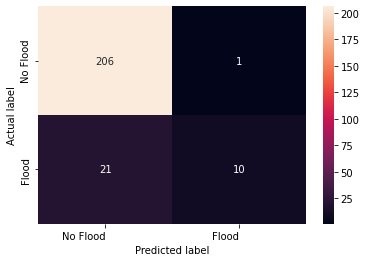

In [29]:
classes = ['No Flood', 'Flood']
conf_mat = confusion_matrix(test_y, test_predict)
df_conf_mat = pd.DataFrame(conf_mat, index = classes, columns = classes)
heat_map = sns.heatmap(df_conf_mat, annot = True, fmt = 'd')
heat_map.yaxis.set_ticklabels(heat_map.yaxis.get_ticklabels(), ha = 'right')
heat_map.xaxis.set_ticklabels(heat_map.xaxis.get_ticklabels(), ha = 'right')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [30]:
print(classification_report(test_y, test_predict, target_names=classes))

              precision    recall  f1-score   support

    No Flood       0.91      1.00      0.95       207
       Flood       0.91      0.32      0.48        31

    accuracy                           0.91       238
   macro avg       0.91      0.66      0.71       238
weighted avg       0.91      0.91      0.89       238

